# K-Means Clustering - Manual


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define the dataset as a pandas dataframe
df = pd.DataFrame({
    'x': [15,20,25,30,28,12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,48,51,55,45,50,61,64,69,72,55,60,65,70,68],
    'y': [35,40,45,50,43,39,36,30,52,54,46,55,59,63,70,66,63,58,60,65,70,68,62,23,14, 8,19, 7,24,20,15,10,12, 9]
})
xminmax = (min(df['x']),max(df['x']))
yminmax = (min(df['y']),max(df['y']))
print('X min: %d and X max: %d' %(xminmax[0],xminmax[1]))
print('Y min: %d and Y max: %d' %(yminmax[0],yminmax[1]))


X min: 12 and X max: 72
Y min: 7 and Y max: 70


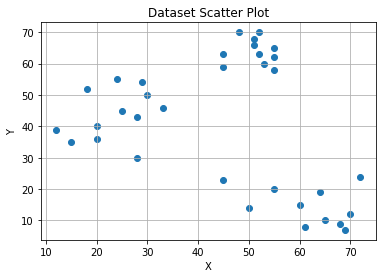

In [3]:
# Plot the dataset
plt.scatter(df['x'],df['y'])
plt.title('Dataset Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [4]:
# Reset the randomizer with a seed value of 200
np.random.seed(200)
k = 3 # Number of clusters (classes)
# Select the first centroid
# centroids[i] = [x,y]
centroids = {
    i+1: [np.random.randint(0,80), # Use any random num within the range of dataset values i.e. 0:80 
          np.random.randint(0,80)]
    for i in range(k)
}
print(centroids.keys())
centroids

dict_keys([1, 2, 3])


{1: [26, 16], 2: [68, 42], 3: [55, 76]}

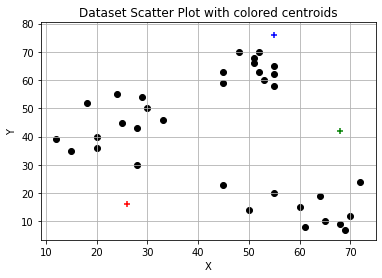

In [5]:
# Visualize the data with colored centroids
plt.scatter(df['x'],df['y'],color='k') # k as in the number of clusters defined in the cell above
colmap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],marker='+',color=colmap[i])
plt.title('Dataset Scatter Plot with colored centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [6]:
# Assign each of the chosen cetroid to a cluster
def centroidAssignment(df,centroids):
    # Use the distance equation to calculate the distance of all the other points to
    # the chosen centroid point
    for i in centroids.keys():
        # distance equation: sqrt((x2-x1)^2 + (y2-y1)^2)
        # x1,y1 : target point coordinates i.e. centroid point
        
        # 'distance_from_{}'.format(i) = 'distance_from_1','distance_from_2','distance_from_3'
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 +
                (df['y'] - centroids[i][1])**2
            )
        )
        
    # print(df.keys())
    # collect the distance column names
    centroid_dist_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # Find which of the points is closest (min dist) to each centroid
    # and assign the column name to the 'closest' column 
    df['closest'] = df.loc[:, centroid_dist_cols].idxmin(axis=1)
    # Remove 'distance_from_' from the char values: distance_from_1, distance_from_2, distance_from_3
    # Use .map() to iteratively remove 'distance_from_' from the char values in the 'closest' column
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    # lstrip('distance_from_') removes 'distance_from_' from the char value: distance_from_1.
    
    # Use .map() to iteratively select the colour map key with the 'closest' column values
    df['color']   = df['closest'].map(lambda x: colmap[x])
    
    return df

In [7]:
df = centroidAssignment(df,centroids)

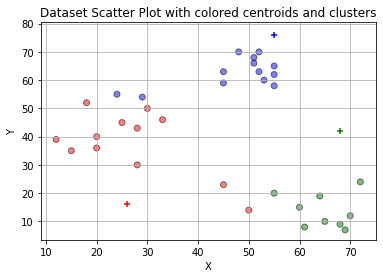

In [8]:
# Visualize the plot with colored centroids and clusters
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],marker='+',color=colmap[i])
plt.title('Dataset Scatter Plot with colored centroids and clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [9]:
# Update the centroid
import copy
# Make a copy of the centroids
old_centroids = copy.deepcopy(centroids)

def UpdateCentroids(centroids):
    # Extract the values of column x and y where the values of closest column == 1,2, and 3
    # The compute the mean centroid for each of those points
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    
    return centroids
    

In [10]:
# Update the centroids
centroids = UpdateCentroids(centroids)

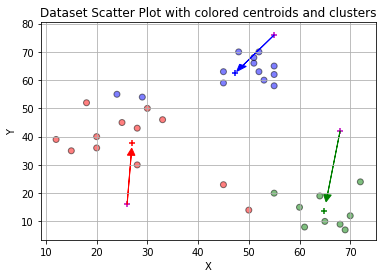

In [11]:
# Visualize the plot with colored centroids and clusters
fig = plt.figure()
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],marker='+',color=colmap[i])
    plt.scatter(*old_centroids[i],marker='+',color='m')#,edgecolor='k')
    
for  i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    new_x = centroids[i][0]
    new_y = centroids[i][1]
    dx = centroids[i][0] - old_x
    dy = centroids[i][1] - old_y
    #ax.arrow(old_x,old_y,dx,dy,width=0.02,color=colmap[i],head_length=0,head_width=0)
    ax.arrow(old_x,old_y,dx*0.8,dy*0.8,width=0.02,color=colmap[i],head_length=2.5,head_width=1.5)
plt.title('Dataset Scatter Plot with colored centroids and clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [12]:
# Centroid Reaasignment
old_centroids = copy.deepcopy(centroids)
df = centroidAssignment(df,centroids)

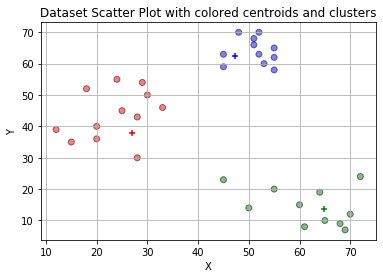

In [13]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],marker='+',color=colmap[i])
    #plt.scatter(*old_centroids[i],marker='+',color='m')#,edgecolor='k')
    
plt.title('Dataset Scatter Plot with colored centroids and clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

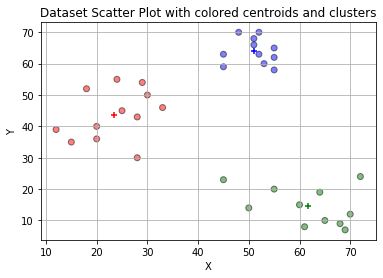

In [14]:
# Repeat the Centroid update and assignment until the values for the closest points in the 
# 'closest' column remain identical to its previous values
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = UpdateCentroids(centroids)
    df = centroidAssignment(df,centroids)
    if closest_centroids.equals(df['closest']):
        break
        
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],marker='+',color=colmap[i])
    #plt.scatter(*old_centroids[i],marker='+',color='m')#,edgecolor='k')
    
plt.title('Dataset Scatter Plot with colored centroids and clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()